#**BIGBASKET FLIPKART,AMAZON PRODUCT RECOMENDATION SYSTEM USING CONTENT BASED FILTERING**

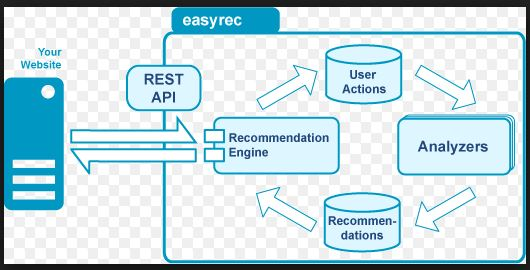

cosine, knn, logitstic ,

In [1]:
!pip install -q --upgrade ipython
!pip install -q --upgrade ipykernel

In [2]:
!pip install tensorflow==2.10.0rc0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


IMPORTING THE LIBRARIES AND PACKAGES

In [4]:
#Libraries and packages
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import plotly.express as px
%matplotlib inline
import ast 
from scipy import stats
import re
from ast import literal_eval
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.metrics.pairwise import linear_kernel, cosine_similarity
from sklearn.neighbors import NearestNeighbors
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import wordnet
import warnings; warnings.simplefilter('ignore')

#**BIGBASKET PRODUCT RECOMMENDER SYSTEM**

IMPORTING THE DATASET

In [5]:
df = pd.read_csv('/content/drive/MyDrive/BigBasket Products.csv',index_col='index')

In [6]:
df

,product,category,sub_category,brand,sale_price,market_price,type,rating,description
index,,,,,,,,,
1,Garlic Oil - Vegetarian Capsule 500 mg,Beauty & Hygiene,Hair Care,Sri Sri Ayurveda,220.00,220.0,Hair Oil & Serum,4.1,This Product contains Garlic Oil that is known...
2,Water Bottle - Orange,"Kitchen, Garden & Pets",Storage & Accessories,Mastercook,180.00,180.0,Water & Fridge Bottles,2.3,"Each product is microwave safe (without lid), ..."
3,"Brass Angle Deep - Plain, No.2",Cleaning & Household,Pooja Needs,Trm,119.00,250.0,Lamp & Lamp Oil,3.4,"A perfect gift for all occasions, be it your m..."
4,Cereal Flip Lid Container/Storage Jar - Assort...,Cleaning & Household,Bins & Bathroom Ware,Nakoda,149.00,176.0,"Laundry, Storage Baskets",3.7,Multipurpose container with an attractive desi...
5,Creme Soft Soap - For Hands & Body,Beauty & Hygiene,Bath & Hand Wash,Nivea,162.00,162.0,Bathing Bars & Soaps,4.4,Nivea Creme Soft Soap gives your skin the best...
...,...,...,...,...,...,...,...,...,...
27551,"Wottagirl! Perfume Spray - Heaven, Classic",Beauty & Hygiene,Fragrances & Deos,Layerr,199.20,249.0,Perfume,3.9,Layerr brings you Wottagirl Classic fragrant b...
27552,Rosemary,Gourmet & World Food,Cooking & Baking Needs,Puramate,67.50,75.0,"Herbs, Seasonings & Rubs",4.0,Puramate rosemary is enough to transform a dis...
27553,Peri-Peri Sweet Potato Chips,Gourmet & World Food,"Snacks, Dry Fruits, Nuts",FabBox,200.00,200.0,Nachos & Chips,3.8,We have taken the richness of Sweet Potatoes (...


DATA ANALYSIS

In [7]:
df.shape

(27555, 9)

In [8]:
df.isnull().sum()

product            1
category           0
sub_category       0
brand              1
sale_price         0
market_price       0
type               0
rating          8626
description      115
dtype: int64

In [9]:
df.info

<bound method DataFrame.info of                                                  product  \
index                                                      
1                 Garlic Oil - Vegetarian Capsule 500 mg   
2                                  Water Bottle - Orange   
3                         Brass Angle Deep - Plain, No.2   
4      Cereal Flip Lid Container/Storage Jar - Assort...   
5                     Creme Soft Soap - For Hands & Body   
...                                                  ...   
27551         Wottagirl! Perfume Spray - Heaven, Classic   
27552                                           Rosemary   
27553                       Peri-Peri Sweet Potato Chips   
27554                          Green Tea - Pure Original   
27555                     United Dreams Go Far Deodorant   

                     category              sub_category  \
index                                                     
1            Beauty & Hygiene                 Hair Care   
2      Kit

In [10]:
df.describe()

,sale_price,market_price,rating
count,27555.000000,27555.000000,18929.000000
mean,322.514808,382.056664,3.943410
std,486.263116,581.730717,0.739063
min,2.450000,3.000000,1.000000
25%,95.000000,100.000000,3.700000
50%,190.000000,220.000000,4.100000
75%,359.000000,425.000000,4.300000
max,12500.000000,12500.000000,5.000000


In [11]:
df.mean()

sale_price      322.514808
market_price    382.056664
rating            3.943410
dtype: float64

In [12]:
df.median()

sale_price      190.0
market_price    220.0
rating            4.1
dtype: float64

In [13]:
df.skew()

sale_price      6.176728
market_price    5.788869
rating         -1.730801
dtype: float64

In [14]:
df.max()

category        Snacks & Branded Foods
sub_category                     Water
sale_price                     12500.0
market_price                   12500.0
type                Yogurt & Shrikhand
rating                             5.0
dtype: object

In [15]:
df.min()

category                   Baby Care
sub_category    All Purpose Cleaners
sale_price                      2.45
market_price                     3.0
type                   Adult Diapers
rating                           1.0
dtype: object

In [16]:
print('Percentage Null Data In Each Column')
print('-'*30)
for col in df.columns:
    null_count = df[col].isnull().sum()
    total_count = df.shape[0]
    print("{} : {:.2f}".format(col,null_count/total_count * 100))

Percentage Null Data In Each Column
------------------------------
product : 0.00
category : 0.00
sub_category : 0.00
brand : 0.00
sale_price : 0.00
market_price : 0.00
type : 0.00
rating : 31.30
description : 0.42


In [17]:
print('Total Null Data')
null_count = df.isnull().sum().sum()
total_count = np.product(df.shape)
print("{:.2f}".format(null_count/total_count * 100))

Total Null Data
3.53


So overall 3% data is missing but 31% of ratings are missing. Since we are going to create a recommender system, let's drop the null values as their will still be over 69% data for recommendation purposes which is enough for us.

In [18]:
df = df.dropna()

In [19]:
df.isnull().sum()

product         0
category        0
sub_category    0
brand           0
sale_price      0
market_price    0
type            0
rating          0
description     0
dtype: int64

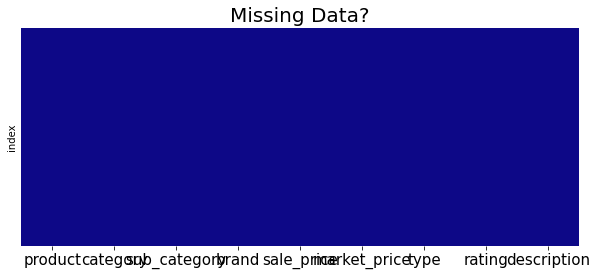

In [20]:
plt.figure(figsize=(10,4))
sns.heatmap(df.isnull(),
            cmap='plasma',
            yticklabels=False,
            cbar=False)
plt.title('Missing Data?',fontsize=20)
plt.xticks(fontsize=15)
plt.show()

NO MISSING DATA 

In [21]:
df  #cleaned dataset

,product,category,sub_category,brand,sale_price,market_price,type,rating,description
index,,,,,,,,,
1,Garlic Oil - Vegetarian Capsule 500 mg,Beauty & Hygiene,Hair Care,Sri Sri Ayurveda,220.00,220.0,Hair Oil & Serum,4.1,This Product contains Garlic Oil that is known...
2,Water Bottle - Orange,"Kitchen, Garden & Pets",Storage & Accessories,Mastercook,180.00,180.0,Water & Fridge Bottles,2.3,"Each product is microwave safe (without lid), ..."
3,"Brass Angle Deep - Plain, No.2",Cleaning & Household,Pooja Needs,Trm,119.00,250.0,Lamp & Lamp Oil,3.4,"A perfect gift for all occasions, be it your m..."
4,Cereal Flip Lid Container/Storage Jar - Assort...,Cleaning & Household,Bins & Bathroom Ware,Nakoda,149.00,176.0,"Laundry, Storage Baskets",3.7,Multipurpose container with an attractive desi...
5,Creme Soft Soap - For Hands & Body,Beauty & Hygiene,Bath & Hand Wash,Nivea,162.00,162.0,Bathing Bars & Soaps,4.4,Nivea Creme Soft Soap gives your skin the best...
...,...,...,...,...,...,...,...,...,...
27551,"Wottagirl! Perfume Spray - Heaven, Classic",Beauty & Hygiene,Fragrances & Deos,Layerr,199.20,249.0,Perfume,3.9,Layerr brings you Wottagirl Classic fragrant b...
27552,Rosemary,Gourmet & World Food,Cooking & Baking Needs,Puramate,67.50,75.0,"Herbs, Seasonings & Rubs",4.0,Puramate rosemary is enough to transform a dis...
27553,Peri-Peri Sweet Potato Chips,Gourmet & World Food,"Snacks, Dry Fruits, Nuts",FabBox,200.00,200.0,Nachos & Chips,3.8,We have taken the richness of Sweet Potatoes (...


VISUALIZATION

In [22]:
counts = df['category'].value_counts()

counts_df = pd.DataFrame({'Category':counts.index,'Counts':counts.values})

In [23]:
px.bar(data_frame=counts_df,
 x='Category',
 y='Counts',
 color='Counts',
 color_continuous_scale='blues',
 text_auto=True,
 title=f'Count of Items in Each Category')

In [24]:
counts = df['sub_category'].value_counts()

counts_df_1 = pd.DataFrame({'Category':counts.index,'Counts':counts.values})[:10]

In [25]:
px.bar(data_frame=counts_df_1,
 x='Category',
 y='Counts',
 color='Counts',
 color_continuous_scale='blues',
 text_auto=True,
 title=f'Top 10 Bought Sub_Categories')

In [26]:
counts = df['brand'].value_counts()

counts_df_brand = pd.DataFrame({'Brand Name':counts.index,'Counts':counts.values})[:10]

In [27]:
px.bar(data_frame=counts_df_brand,
 x='Brand Name',
 y='Counts',
 color='Counts',
 color_continuous_scale='blues',
 text_auto=True,
 title=f'Top 10 Brand Items based on Item Counts')

In [28]:
counts = df['type'].value_counts()

counts_df_type = pd.DataFrame({'Type':counts.index,'Counts':counts.values})[:10]

In [29]:
px.bar(data_frame=counts_df_type,
 x='Type',
 y='Counts',
 color='Counts',
 color_continuous_scale='blues',
 text_auto=True,
 title=f'Top 10 Types of Products based on Item Counts')

#DEMOGRAPHIC FILTER RECOMMENDATION

In [30]:
def sort_recommendor(col='rating',sort_type = False):
    """
    A recommendor based on sorting products on the column passed.
    Arguments to be passed:
    
    col: The Feature to be used for recommendation.
    sort_type: True for Ascending Order
    """
    rated_recommend = df.copy()
    if rated_recommend[col].dtype == 'O':
        col='rating'
    rated_recommend = rated_recommend.sort_values(by=col,ascending = sort_type)
    return rated_recommend[['product','brand','sale_price','rating']].head(10)

In [31]:
help(sort_recommendor)

Help on function sort_recommendor in module __main__:

sort_recommendor(col='rating', sort_type=False)
    A recommendor based on sorting products on the column passed.
    Arguments to be passed:
    
    col: The Feature to be used for recommendation.
    sort_type: True for Ascending Order



In [32]:
sort_recommendor(col='sale_price',sort_type=True)

,product,brand,sale_price,rating
index,,,,
21313,Serum,Livon,3.0,2.5
18291,Sugar Coated Chocolate,Cadbury Gems,5.0,4.2
21229,Dish Shine Bar,Exo,5.0,4.2
14539,Cadbury Perk - Chocolate Bar,Cadbury,5.0,4.2
19539,Layer Cake - Chocolate,Winkies,5.0,4.2
2979,Sugar Free Chewing Gum - Mixed Fruit,Orbit,5.0,4.2
15927,Dreams Cup Cake - Choco,Elite,5.0,3.9
6015,Good Day Butter Cookies,Britannia,5.0,4.1
27414,Layer Cake - Orange,Winkies,5.0,4.1


 top product has rating of 2.5 which is quite bad so let's filter down by setting a threshold rating.

In [33]:
C= df['rating'].mean()
C

3.9430626326963902

 average rating of products is 3.94 Let's use 3.5 as the threshold.

In [34]:
def sort_recommendor(col='rating',sort_type = False):
    """
    A recommendor based on sorting products on the column passed.
    Arguments to be passed:
    
    col: The Feature to be used for recommendation.
    sort_type: True for Ascending Order
    """
    rated_recommend = df.copy().loc[df['rating'] >= 3.5]
    if rated_recommend[col].dtype == 'O':
        col='rating'
    rated_recommend = rated_recommend.sort_values(by=col,ascending = sort_type)
    return rated_recommend[['product','brand','sale_price','rating']].head(10)

In [35]:
sort_recommendor(col='sale_price',sort_type=True)

,product,brand,sale_price,rating
index,,,,
2762,Orbit Sugar-Free Chewing Gum - Lemon & Lime,Wrigleys,5.0,4.2
3446,Marie Light Biscuits - Active,Sunfeast,5.0,4.5
14604,50-50 Timepass Biscuits,Britannia,5.0,3.9
17641,Hand Wash - Moisture Shield,Savlon,5.0,4.4
27491,50-50 Timepass Salted Biscuits,Britannia,5.0,4.2
26585,Polo - The Mint With The Hole,Nestle,5.0,4.4
2979,Sugar Free Chewing Gum - Mixed Fruit,Orbit,5.0,4.2
19539,Layer Cake - Chocolate,Winkies,5.0,4.2
19203,Bounce Biscuits - Choco Creme,Sunfeast,5.0,4.2


2.5 rated product is not recommended now!!

#CONTENT BASED RECOMMENDAR SYSTEM
using TF AND IDF

In [36]:
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(df['description'])
tfidf_matrix.shape

(18840, 23342)

In [37]:
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)
cosine_sim

tcmalloc: large alloc 1508311040 bytes == 0x36dd8000 @  0x7f90cbaac1e7 0x7f90bd81c0ce 0x7f90bd872cf5 0x7f90bd872f4f 0x7f90bd915673 0x5936cc 0x548c51 0x5127f1 0x593dd7 0x548ae9 0x51566f 0x593dd7 0x548ae9 0x51566f 0x4bc98a 0x4bd06c 0x5af04b 0x6166c6 0x4d0c88 0x514365 0x549e0e 0x593fce 0x548ae9 0x5127f1 0x549576 0x593fce 0x5118f8 0x549576 0x604173 0x62a809 0x59358d
tcmalloc: large alloc 2839568384 bytes == 0x90c48000 @  0x7f90cbaae001 0x7f90bd81c1af 0x7f90bd872c23 0x7f90bd873a87 0x7f90bd915823 0x5936cc 0x548c51 0x5127f1 0x593dd7 0x548ae9 0x51566f 0x549576 0x593fce 0x548ae9 0x51566f 0x549e0e 0x593fce 0x548ae9 0x5127f1 0x549576 0x593fce 0x5118f8 0x549576 0x604173 0x62a809 0x59358d 0x515244 0x598ef4 0x515a6e 0x598ef4 0x515a6e


array([[1.        , 0.01632718, 0.00999603, ..., 0.01056047, 0.01133156,
        0.        ],
       [0.01632718, 1.        , 0.00719713, ..., 0.        , 0.        ,
        0.        ],
       [0.00999603, 0.00719713, 1.        , ..., 0.00635776, 0.        ,
        0.        ],
       ...,
       [0.01056047, 0.        , 0.00635776, ..., 1.        , 0.        ,
        0.        ],
       [0.01133156, 0.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        1.        ]])

In [38]:
indices = pd.Series(df.index, index=df['product']).drop_duplicates()

def get_recommendations_1(title, cosine_sim=cosine_sim):
    
    idx = indices[title]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:11]
    movie_indices = [i[0] for i in sim_scores]
    return df['product'].iloc[movie_indices]

getting recommendation for pairs after computing the cosine similarity

In [39]:
get_recommendations_1('Water Bottle - Orange')

index
1677         Brass Nanda Stand Goblets - No.1
2162         Brass Kachua Stand Deepam - No.1
2756     Brass Angle Deep Stand - Plain, No.2
5400       Brass Lakshmi Deepam - Plain, No.2
6520                Brass Kuber Deepam - No.1
10504               Brass Kuber Deepam - No.2
11226    Brass Angle Deep Stand - Plain, No.3
11504    Brass Angle Deep Stand - Plain, No.1
12699        Brass Kachua Stand Deepam - No.2
18572               Brass Kuber Deepam - No.3
Name: product, dtype: object

In [40]:
get_recommendations_1('Cadbury Perk - Chocolate Bar')

index
27049                        Pickle - Mixed
6601                  Pickle - Kaduku Mango
17934                Pickle - Mix Vegetable
27105                        Pickle - Prawn
3962                  Pickle - Tender Mango
16875             Olive Oil - Carrot Pickle
3444                     Pickle - Cut Mango
17237      Andhra Special Red Chilli Pickle
27234    Pickle - Lime (South Indian Style)
4955                    Pickle - Gooseberry
Name: product, dtype: object

the above is wrong becauseOur search was chocolate yet we got Cashews and Nuts recommended.
We need to optimize this based on category, sub_category and brand.

In [41]:
df2 = df.copy()

In [42]:
df2.head()

,product,category,sub_category,brand,sale_price,market_price,type,rating,description
index,,,,,,,,,
1,Garlic Oil - Vegetarian Capsule 500 mg,Beauty & Hygiene,Hair Care,Sri Sri Ayurveda,220.0,220.0,Hair Oil & Serum,4.1,This Product contains Garlic Oil that is known...
2,Water Bottle - Orange,"Kitchen, Garden & Pets",Storage & Accessories,Mastercook,180.0,180.0,Water & Fridge Bottles,2.3,"Each product is microwave safe (without lid), ..."
3,"Brass Angle Deep - Plain, No.2",Cleaning & Household,Pooja Needs,Trm,119.0,250.0,Lamp & Lamp Oil,3.4,"A perfect gift for all occasions, be it your m..."
4,Cereal Flip Lid Container/Storage Jar - Assort...,Cleaning & Household,Bins & Bathroom Ware,Nakoda,149.0,176.0,"Laundry, Storage Baskets",3.7,Multipurpose container with an attractive desi...
5,Creme Soft Soap - For Hands & Body,Beauty & Hygiene,Bath & Hand Wash,Nivea,162.0,162.0,Bathing Bars & Soaps,4.4,Nivea Creme Soft Soap gives your skin the best...


In [43]:
rmv_spc = lambda a:a.strip()
get_list = lambda a:list(map(rmv_spc,re.split('& |, |\*|\n', a)))

In [44]:
get_list('A & B, C')

['A', 'B', 'C']

In [45]:
for col in ['category', 'sub_category', 'type']:
    df2[col] = df2[col].apply(get_list)

In [46]:
df2.head()

,product,category,sub_category,brand,sale_price,market_price,type,rating,description
index,,,,,,,,,
1,Garlic Oil - Vegetarian Capsule 500 mg,"[Beauty, Hygiene]",[Hair Care],Sri Sri Ayurveda,220.0,220.0,"[Hair Oil, Serum]",4.1,This Product contains Garlic Oil that is known...
2,Water Bottle - Orange,"[Kitchen, Garden, Pets]","[Storage, Accessories]",Mastercook,180.0,180.0,"[Water, Fridge Bottles]",2.3,"Each product is microwave safe (without lid), ..."
3,"Brass Angle Deep - Plain, No.2","[Cleaning, Household]",[Pooja Needs],Trm,119.0,250.0,"[Lamp, Lamp Oil]",3.4,"A perfect gift for all occasions, be it your m..."
4,Cereal Flip Lid Container/Storage Jar - Assort...,"[Cleaning, Household]","[Bins, Bathroom Ware]",Nakoda,149.0,176.0,"[Laundry, Storage Baskets]",3.7,Multipurpose container with an attractive desi...
5,Creme Soft Soap - For Hands & Body,"[Beauty, Hygiene]","[Bath, Hand Wash]",Nivea,162.0,162.0,"[Bathing Bars, Soaps]",4.4,Nivea Creme Soft Soap gives your skin the best...


To avoid duplicacy, we will be converting everything to lowercase and also removing spaces between words.
This will ensure that our recommendor doesn't consider Chocolate of Cholocate IceCream and Chocolate Bar as the same.

In [47]:
def cleaner(x):
    if isinstance(x, list):
        return [str.lower(i.replace(" ", "")) for i in x]
    else:
        if isinstance(x, str):
            return str.lower(x.replace(" ", ""))
        else:
            return ''

In [48]:
for col in ['category', 'sub_category', 'type','brand']:
    df2[col] = df2[col].apply(cleaner)

In [49]:
df2.head()

,product,category,sub_category,brand,sale_price,market_price,type,rating,description
index,,,,,,,,,
1,Garlic Oil - Vegetarian Capsule 500 mg,"[beauty, hygiene]",[haircare],srisriayurveda,220.0,220.0,"[hairoil, serum]",4.1,This Product contains Garlic Oil that is known...
2,Water Bottle - Orange,"[kitchen, garden, pets]","[storage, accessories]",mastercook,180.0,180.0,"[water, fridgebottles]",2.3,"Each product is microwave safe (without lid), ..."
3,"Brass Angle Deep - Plain, No.2","[cleaning, household]",[poojaneeds],trm,119.0,250.0,"[lamp, lampoil]",3.4,"A perfect gift for all occasions, be it your m..."
4,Cereal Flip Lid Container/Storage Jar - Assort...,"[cleaning, household]","[bins, bathroomware]",nakoda,149.0,176.0,"[laundry, storagebaskets]",3.7,Multipurpose container with an attractive desi...
5,Creme Soft Soap - For Hands & Body,"[beauty, hygiene]","[bath, handwash]",nivea,162.0,162.0,"[bathingbars, soaps]",4.4,Nivea Creme Soft Soap gives your skin the best...


We will now be joining the values of category, sub_category, type and brand

In [50]:
def couple(x):
    return ' '.join(x['category']) + ' ' + ' '.join(x['sub_category']) + ' '+x['brand']+' ' +' '.join( x['type'])
df2['soup'] = df2.apply(couple, axis=1)

In [51]:
df2['soup'].head()

index
1    beauty hygiene haircare srisriayurveda hairoil...
2    kitchen garden pets storage accessories master...
3       cleaning household poojaneeds trm lamp lampoil
4    cleaning household bins bathroomware nakoda la...
5    beauty hygiene bath handwash nivea bathingbars...
Name: soup, dtype: object

We need to Count the String Vectors and then compute the Cosine Similarity Score.

In [52]:
count = CountVectorizer(stop_words='english')
count_matrix = count.fit_transform(df2['soup'])

In [53]:
cosine_sim2 = cosine_similarity(count_matrix, count_matrix)
cosine_sim2

tcmalloc: large alloc 2839568384 bytes == 0x13a04e000 @  0x7f90cbaae001 0x7f90bd81c1af 0x7f90bd872c23 0x7f90bd873a87 0x7f90bd915823 0x5936cc 0x548c51 0x5127f1 0x593dd7 0x548ae9 0x51566f 0x549576 0x593fce 0x548ae9 0x51566f 0x549e0e 0x593fce 0x548ae9 0x5127f1 0x549576 0x593fce 0x5118f8 0x549576 0x604173 0x62a809 0x59358d 0x515244 0x598ef4 0x515a6e 0x598ef4 0x515a6e


array([[1.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.27216553],
       [0.        , 1.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 1.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.27216553, 0.        , 0.        , ..., 0.        , 0.        ,
        1.        ]])

In [54]:
df2 = df2.reset_index()
indices = pd.Series(df2.index, index=df2['product'])

In [55]:
def get_recommendations_2(title, cosine_sim=cosine_sim):
    idx = indices[title]

    sim_scores = list(enumerate(cosine_sim[idx]))

    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    sim_scores = sim_scores[1:11]

    movie_indices = [i[0] for i in sim_scores]

    return df2['product'].iloc[movie_indices]

comparing old vs new recommendation

In [56]:
old_rec = get_recommendations_1('Water Bottle - Orange').values
new_rec = get_recommendations_2('Water Bottle - Orange', cosine_sim2).values

pd.DataFrame({'Old Recommendor': old_rec,'New Recommendor':new_rec})

,Old Recommendor,New Recommendor
0,"Rectangular Plastic Container - With Lid, Mult...",Glass Water Bottle - Aquaria Organic Purple
1,"Jar - With Lid, Yellow",Glass Water Bottle With Round Base - Transpare...
2,"Round & Flat Storage Container - With lid, Green",H2O Unbreakable Water Bottle - Pink
3,Premium Rectangular Plastic Container With Lid...,Water Bottle H2O Purple
4,Premium Round Plastic Container With Lid - Yellow,H2O Unbreakable Water Bottle - Green
5,Premium Rectangular Plastic Container With Lid...,Regel Tritan Plastic Sports Water Bottle - Black
6,Premium Round & Flat Storage Container With Li...,Apsara 1 Water Bottle - Assorted Colour
7,Premium Round Plastic Container With Lid - Blue,"Glass Water Bottle With Round Base - Yellow, B..."
8,Premium Round Plastic Container With Lid - Mul...,Trendy Stainless Steel Bottle With Steel Cap -...
9,Premium Round Plastic Container With Lid - Pink,"Penta Plastic Pet Water Bottle - Violet, Wide ..."


In [57]:
old_rec = get_recommendations_1('Cadbury Perk - Chocolate Bar').values
new_rec = get_recommendations_2('Cadbury Perk - Chocolate Bar', cosine_sim2).values

pd.DataFrame({'Old Recommendor': old_rec,'New Recommendor':new_rec})

,Old Recommendor,New Recommendor
0,Cadbury Perk - Chocolate Bar,Nutties Chocolate Pack
1,Choco Stick - Hexagon Pack,5 Star Chocolate Bar
2,Luvit Chocwich White Home Delights 187 g,Dairy Milk Silk - Hazelnut Chocolate Bar
3,Luvit Chocwich Home Delights 187 g,"Perk - Chocolate, Home Treats, 175.5 g, 27 Units"
4,Wafer Biscuits - Chocolate Flavor,Dark Milk Chocolate Bar
5,Drinking Chocolate - Original,Dairy Milk Silk Mousse - Chocolate Bar
6,Drinking Chocolate - Original,Dark Milk Chocolate Bar
7,Biscuit - Bourbon Creams,Chocolate Bar - Fuse
8,Wafers With Hazelnut Cream,Choclairs Gold Coffee
9,Choco Stick - Chocolate,"5 Star Chocolate Home Pack, 200 g, 20 units"


#**FLIPKART**

IMPORTING THE LIBRARIES AND PACKAGES

In [30]:
import re
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.neighbors import NearestNeighbors
import warnings; warnings.simplefilter('ignore')
%matplotlib inline
from sklearn.decomposition import TruncatedSVD
from sklearn import neighbors
from sklearn.metrics import mean_squared_error 
from math import *
from termcolor import colored

In [31]:
products = pd.read_csv('/content/drive/MyDrive/flipkart_com-ecommerce_sample.csv')

DATA ANALYSIS

In [32]:
products.head()

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications
0,c2d766ca982eca8304150849735ffef9,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2FF9KEDEFGF,999.0,379.0,"[""http://img5a.flixcart.com/image/short/u/4/a/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ..."
1,7f7036a6d550aaa89d34c77bd39a5e48,2016-03-25 22:59:23 +0000,http://www.flipkart.com/fabhomedecor-fabric-do...,FabHomeDecor Fabric Double Sofa Bed,"[""Furniture >> Living Room Furniture >> Sofa B...",SBEEH3QGU7MFYJFY,32157.0,22646.0,"[""http://img6a.flixcart.com/image/sofa-bed/j/f...",False,FabHomeDecor Fabric Double Sofa Bed (Finish Co...,No rating available,No rating available,FabHomeDecor,"{""product_specification""=>[{""key""=>""Installati..."
2,f449ec65dcbc041b6ae5e6a32717d01b,2016-03-25 22:59:23 +0000,http://www.flipkart.com/aw-bellies/p/itmeh4grg...,AW Bellies,"[""Footwear >> Women's Footwear >> Ballerinas >...",SHOEH4GRSUBJGZXE,999.0,499.0,"[""http://img5a.flixcart.com/image/shoe/7/z/z/r...",False,Key Features of AW Bellies Sandals Wedges Heel...,No rating available,No rating available,AW,"{""product_specification""=>[{""key""=>""Ideal For""..."
3,0973b37acd0c664e3de26e97e5571454,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2F6HUZMQ6SJ,699.0,267.0,"[""http://img5a.flixcart.com/image/short/6/2/h/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ..."
4,bc940ea42ee6bef5ac7cea3fb5cfbee7,2016-03-25 22:59:23 +0000,http://www.flipkart.com/sicons-all-purpose-arn...,Sicons All Purpose Arnica Dog Shampoo,"[""Pet Supplies >> Grooming >> Skin & Coat Care...",PSOEH3ZYDMSYARJ5,220.0,210.0,"[""http://img5a.flixcart.com/image/pet-shampoo/...",False,Specifications of Sicons All Purpose Arnica Do...,No rating available,No rating available,Sicons,"{""product_specification""=>[{""key""=>""Pet Type"",..."


In [33]:
products.shape

(20000, 15)

In [34]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   uniq_id                  20000 non-null  object 
 1   crawl_timestamp          20000 non-null  object 
 2   product_url              20000 non-null  object 
 3   product_name             20000 non-null  object 
 4   product_category_tree    20000 non-null  object 
 5   pid                      20000 non-null  object 
 6   retail_price             19922 non-null  float64
 7   discounted_price         19922 non-null  float64
 8   image                    19997 non-null  object 
 9   is_FK_Advantage_product  20000 non-null  bool   
 10  description              19998 non-null  object 
 11  product_rating           20000 non-null  object 
 12  overall_rating           20000 non-null  object 
 13  brand                    14136 non-null  object 
 14  product_specifications

In [35]:
products.describe()

,retail_price,discounted_price
count,19922.000000,19922.000000
mean,2979.206104,1973.401767
std,9009.639341,7333.586040
min,35.000000,35.000000
25%,666.000000,350.000000
50%,1040.000000,550.000000
75%,1999.000000,999.000000
max,571230.000000,571230.000000


In [36]:
products.isnull().sum()

uniq_id                       0
crawl_timestamp               0
product_url                   0
product_name                  0
product_category_tree         0
pid                           0
retail_price                 78
discounted_price             78
image                         3
is_FK_Advantage_product       0
description                   2
product_rating                0
overall_rating                0
brand                      5864
product_specifications       14
dtype: int64

In [37]:
products.max()

uniq_id                                     fffe208fe08b938e4eda78727a99111d
crawl_timestamp                                    2016-06-28 08:45:50 +0000
product_url                http://www.flipkart.com/zyxel-vmg1312-b10a-vds...
product_name                               Tarkan Unique Style-2016 Umbrella
product_category_tree       ["xy decor Cotton Sofa Cover (white Pack of 6)"]
pid                                                         YSPEGGA5JKZFHP97
retail_price                                                        571230.0
discounted_price                                                    571230.0
is_FK_Advantage_product                                                 True
product_rating                                           No rating available
overall_rating                                           No rating available
dtype: object

In [38]:
products.min()

uniq_id                                     0001d5429cf08061039da491b1aad68d
crawl_timestamp                                    2015-12-01 06:13:00 +0000
product_url                http://www.flipkart.com/109f-checkered-women-s...
product_name                                        109F Solid Women's Tunic
product_category_tree          ["883 Police Full Sleeve Solid Men's Jacket"]
pid                                                         ABQEJ7YQTNQGMXZV
retail_price                                                            35.0
discounted_price                                                        35.0
is_FK_Advantage_product                                                False
product_rating                                                             1
overall_rating                                                             1
dtype: object

In [39]:
products.mean()

retail_price               2979.206104
discounted_price           1973.401767
is_FK_Advantage_product       0.039250
dtype: float64

In [40]:
products.skew()

retail_price               18.668653
discounted_price           28.425512
is_FK_Advantage_product     4.745728
dtype: float64

PREPROCESSING:


Total number of products that we have in our dataset is exactly 2000. So it is not easy for use to know every individual products looking directly to them.

In [41]:
len(products['product_name'].unique()),len(products['uniq_id'].unique())

(12676, 20000)

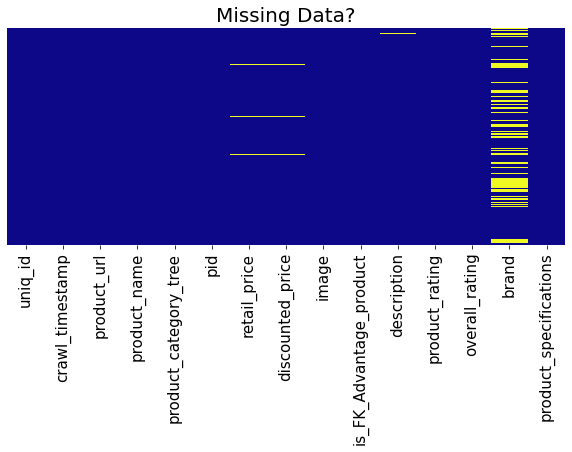

In [42]:
plt.figure(figsize=(10,4))
sns.heatmap(products.isnull(),
            cmap='plasma',
            yticklabels=False,
            cbar=False)
plt.title('Missing Data?',fontsize=20)
plt.xticks(fontsize=15)
plt.show()

VISUALIZATION

In [43]:
x = 0
for y in products['product_rating']:
  if y=='No rating available':
    x=x+1
print(x)

18151


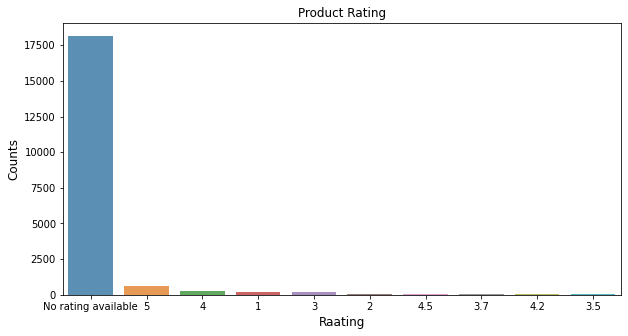

In [44]:
rating_count = products['product_rating'].value_counts()
rating_count = rating_count[:10,]
plt.figure(figsize=(10,5))
sns.barplot(rating_count.index, rating_count.values, alpha=0.8)
plt.title('Product Rating')
plt.ylabel('Counts', fontsize=12)
plt.xlabel('Rating', fontsize=12)
plt.show()

CLEANING

In [45]:
products['disct_percentage']=(products['retail_price']-products['discounted_price'])/products['retail_price']
products['disct_percentage']=np.round(products['disct_percentage'],2)

In [46]:
products['product_category_tree'] = products['product_category_tree'].str.replace(r';|\[|\]|\,|\(|\'|\"|\)|\.', '')
products['product_category_tree'] = products['product_category_tree'].str.replace(r'\d+', '')
products['product_category_tree'] = products['product_category_tree'].str.replace(' ', '')
products['product_category_tree'] = products['product_category_tree'].str.replace('>', ' ')

In [47]:
products['product_rating']=products['product_rating'].replace('No rating available',np.NaN) # Replacing No rating available with NaN
s = products["product_rating"].astype(float).mean() # Calculating the mean of all the given rating
products["product_rating"] = products["product_rating"].astype(float).subtract(s)
products['product_rating'] = products['product_rating'].fillna(0)
products['disct_percentage'] = products['disct_percentage'].fillna(0)        # Replacing NaN values with 0s

In [48]:
products['description'][0]

"Key Features of Alisha Solid Women's Cycling Shorts Cotton Lycra Navy, Red, Navy,Specifications of Alisha Solid Women's Cycling Shorts Shorts Details Number of Contents in Sales Package Pack of 3 Fabric Cotton Lycra Type Cycling Shorts General Details Pattern Solid Ideal For Women's Fabric Care Gentle Machine Wash in Lukewarm Water, Do Not Bleach Additional Details Style Code ALTHT_3P_21 In the Box 3 shorts"

Converting Text to Vectors using Tf-Idf

In [49]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfv = TfidfVectorizer(max_features=None,
                     strip_accents='unicode',
                     analyzer='word',
                     min_df=10,
                     token_pattern=r'\w{1,}',
                     ngram_range=(1,3),#take the combination of 1-3 different kind of words
                     stop_words='english')#removes all the unnecessary characters like the,in etc.
products['description'] = products['description'].fillna('')

In [50]:
#fitting the description column.
tfv_matrix = tfv.fit_transform(products['description'])#converting everythinng to sparse matrix.

In [51]:
tfv_matrix

<20000x23315 sparse matrix of type '<class 'numpy.float64'>'
	with 1510389 stored elements in Compressed Sparse Row format>

In [52]:
from sklearn.metrics.pairwise import sigmoid_kernel
sig = sigmoid_kernel(tfv_matrix,tfv_matrix)

tcmalloc: large alloc 1444577280 bytes == 0xb1df0000 @  0x7febde7711e7 0x7febd04e10ce 0x7febd0537cf5 0x7febd0537f4f 0x7febd05da673 0x5936cc 0x548c51 0x5127f1 0x593dd7 0x548ae9 0x51566f 0x593dd7 0x548ae9 0x51566f 0x4bc98a 0x4bd06c 0x5af04b 0x6166c6 0x4d0c88 0x514365 0x549e0e 0x593fce 0x548ae9 0x5127f1 0x549576 0x593fce 0x5118f8 0x549576 0x604173 0x62a809 0x59358d
tcmalloc: large alloc 2889146368 bytes == 0x107f98000 @  0x7febde7711e7 0x7febd04e10ce 0x7febd0537cf5 0x7febd0537f4f 0x7febd05da673 0x5936cc 0x548c51 0x5127f1 0x593dd7 0x548ae9 0x51566f 0x593dd7 0x548ae9 0x51566f 0x4bc98a 0x4bd06c 0x5af04b 0x6166c6 0x4d0c88 0x514365 0x549e0e 0x593fce 0x548ae9 0x5127f1 0x549576 0x593fce 0x5118f8 0x549576 0x604173 0x62a809 0x59358d
tcmalloc: large alloc 3200000000 bytes == 0x1b4ae6000 @  0x7febde773001 0x7febd04e11af 0x7febd0537c23 0x7febd0538a87 0x7febd05da823 0x5936cc 0x548c51 0x5127f1 0x593dd7 0x548ae9 0x51566f 0x549576 0x593fce 0x548ae9 0x51566f 0x549e0e 0x593fce 0x548ae9 0x5127f1 0x549576 0x

In [53]:
sig[0]

array([0.76161217, 0.76159453, 0.76159494, ..., 0.76159416, 0.76159416,
       0.76159416])

In [54]:
indices = pd.Series(products.index,index=products['product_name']).drop_duplicates()

In [55]:
indices.head(20)

product_name
Alisha Solid Women's Cycling Shorts                                       0
FabHomeDecor Fabric Double Sofa Bed                                       1
AW Bellies                                                                2
Alisha Solid Women's Cycling Shorts                                       3
Sicons All Purpose Arnica Dog Shampoo                                     4
Eternal Gandhi Super Series Crystal Paper Weights  with Silver Finish     5
Alisha Solid Women's Cycling Shorts                                       6
FabHomeDecor Fabric Double Sofa Bed                                       7
dilli bazaaar Bellies, Corporate Casuals, Casuals                         8
Alisha Solid Women's Cycling Shorts                                       9
Ladela Bellies                                                           10
Carrel Printed Women's                                                   11
Sicons All Purpose Tea Tree Dog Shampoo                                  12

In [56]:
def product_recommendation(title,sig=sig):
    indx = indices[title]
    
    #getting pairwise similarity scores
    sig_scores = list(enumerate(sig[indx]))
    
    #sorting products
    sig_scores = sorted(sig_scores, key=lambda x: x[1], reverse=True)
    
    #10 most similar products score
    sig_scores = sig_scores[1:11]
    
    #product indexes
    product_indices = [i[0] for i in sig_scores]
    
    #Top 10 most similar products
    return products['product_name'].iloc[product_indices]

In [57]:
n=input("Enter the name of the product: ")
print("\nTop Recommended products are: \n")
print(product_recommendation(n).unique())

Enter the name of the product: Style Foot Bellies

Top Recommended products are: 

['Ladela Bellies' 'Klaur Melbourne Bellies' 'Mobiroy Bellies'
 'Oggo Deo Bellies' 'Bootwale Bellies']


#**AMAZON**

IMPORTING THE LIBRARIES

In [1]:
!pip3 install -q surprise

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import ast 
from scipy import stats
from ast import literal_eval
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.metrics.pairwise import linear_kernel, cosine_similarity
from sklearn.neighbors import NearestNeighbors
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import wordnet
from surprise import Reader, Dataset, SVD
from surprise.model_selection import cross_validate

import warnings; warnings.simplefilter('ignore')

In [3]:
! pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

IMORTING THE DATASET

In [4]:

product = pd.read_csv('/content/drive/MyDrive/product.csv')

product.head()

,Unnamed: 0,asin,avg.rating,avg.helpful.ratio,also_bought,also_viewed,brand,categories,description,price,salesRank,title
0,1,7806397051,2.50,NaN,"['B00KR26VFE', 'B00E7LQHZ0', 'B00BMW24TU', 'B0...","['B008GOR6O0', 'B00EOFEKF8', 'B00IIFVJZ4', 'B0...",COKA,"[['Beauty', 'Makeup', 'Face', 'Concealers & Ne...",An extensive range of 15 multiple vibrant long...,5.04,{'Beauty': 10486},WAWO 15 Color Professionl Makeup Eyeshadow Cam...
1,2,9759091062,3.09,NaN,"['B0054GLD1U', 'B003BRZCUC', 'B0054GBXOW', 'B0...","['B0054GBXOW', 'B0054GLD1U', 'B006VDOPPQ', 'B0...",Xtreme Brite,"[['Beauty', 'Hair Care', 'Styling Products', '...",Xtreme Brite Brightening gel is a highly conc...,19.99,{'Beauty': 52254},Xtreme Brite Brightening Gel 1oz.
2,3,9788072216,5.00,NaN,"['B006C5OHSI', 'B006P14842', 'B0072CSVB4', 'B0...","['B0072CSVB4', 'B005YWBOHW', 'B00CGOUL2A', 'B0...",Prada,"[['Beauty', 'Fragrance', ""Women's"", 'Eau de Pa...",Prada Candy By Prada Eau De Parfum Spray 1.7 O...,65.86,{'Beauty': 78916},Prada Candy By Prada Eau De Parfum Spray 1.7 O...
3,4,9790790961,4.60,NaN,"['B007P7OPQQ', 'B0017JT658', 'B0084HM1DA', 'B0...","['B005M2AQRI', 'B000VOHKK8', 'B0017JT658', 'B0...",Versace,"[['Beauty', 'Fragrance', ""Women's"", 'Eau de To...",Versace Bright Crystal Perfume for Women 3 oz ...,52.33,{'Beauty': 764},Versace Bright Crystal Eau de Toilette Spray f...
4,5,9790794231,4.50,NaN,"['B0019M21OQ', 'B000E7YM8K', 'B0006V31FY', 'B0...","['B000E7YM8K', 'B0019M21OQ', 'B0006V31FY', 'B0...",,"[['Beauty', 'Fragrance', ""Women's"", 'Eau de Pa...",STELLA For Women By STELLA MCCARTNEY 1.7 oz ED...,NaN,{'Beauty': 142503},Stella McCartney Stella


DATA ANALYSIS

In [5]:
product.shape

(11346, 12)

In [6]:
product.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11346 entries, 0 to 11345
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         11346 non-null  int64  
 1   asin               11346 non-null  object 
 2   avg.rating         11346 non-null  float64
 3   avg.helpful.ratio  792 non-null    float64
 4   also_bought        11346 non-null  object 
 5   also_viewed        11346 non-null  object 
 6   brand              11330 non-null  object 
 7   categories         11346 non-null  object 
 8   description        10664 non-null  object 
 9   price              10941 non-null  float64
 10  salesRank          11346 non-null  object 
 11  title              11346 non-null  object 
dtypes: float64(3), int64(1), object(8)
memory usage: 1.0+ MB


In [7]:
product.describe()

,Unnamed: 0,avg.rating,avg.helpful.ratio,price
count,11346.000000,11346.000000,792.000000,10941.000000
mean,5673.500000,4.163377,0.736503,16.617354
std,3275.452411,0.770957,0.319704,19.305909
min,1.000000,1.000000,0.000000,0.010000
25%,2837.250000,3.800000,0.500000,6.680000
50%,5673.500000,4.330000,0.860000,11.590000
75%,8509.750000,4.750000,1.000000,20.000000
max,11346.000000,5.000000,1.000000,499.000000


In [8]:
product.isnull().sum()

Unnamed: 0               0
asin                     0
avg.rating               0
avg.helpful.ratio    10554
also_bought              0
also_viewed              0
brand                   16
categories               0
description            682
price                  405
salesRank                0
title                    0
dtype: int64

In [9]:
product.mean()

Unnamed: 0           5673.500000
avg.rating              4.163377
avg.helpful.ratio       0.736503
price                  16.617354
dtype: float64

In [10]:
product.max()

Unnamed: 0                                                       11346
asin                                                        B00LLPT4HI
avg.rating                                                         5.0
avg.helpful.ratio                                                  1.0
also_bought          ['B00M0TPP4U', 'B005M2IHME', 'B00J8KSYOC', 'B0...
also_viewed          ['B00M0DSWOQ', 'B00KVF7ORQ', 'B00KL5GJOK', 'B0...
categories                         [['Beauty', 'Tools & Accessories']]
price                                                            499.0
salesRank                                                           {}
title                virgin hair fertilizer now wears a new name (2...
dtype: object

In [11]:
product.min()

Unnamed: 0                                                           1
asin                                                        7806397051
avg.rating                                                         1.0
avg.helpful.ratio                                                  0.0
also_bought                                                           
also_viewed                                                           
categories           [['Beauty', 'Bath & Body', 'Bath', 'Bath Bombs']]
price                                                             0.01
salesRank                                                             
title                                                                 
dtype: object

In [12]:
product.skew()

Unnamed: 0           0.000000
avg.rating          -1.390513
avg.helpful.ratio   -1.069021
price                6.630744
dtype: float64

In [13]:
product['also_bought'] = product['also_bought'].fillna('')
product['also_viewed'] = product['also_viewed'].fillna('')
product['brand'] = product['brand'].fillna('')
product['description'] = product['description'].fillna('')
product['title'] = product['title'].fillna('')

In [14]:
product.shape

(11346, 12)

In [15]:
product_df = pd.read_csv('/content/drive/MyDrive/product.csv', index_col='title')['description']
print (len(product_df))
print (product_df.head(5))

11346
title
WAWO 15 Color Professionl Makeup Eyeshadow Camouflage Facial Concealer Neutral Palette    An extensive range of 15 multiple vibrant long...
Xtreme Brite Brightening Gel 1oz.                                                         Xtreme Brite  Brightening gel is a highly conc...
Prada Candy By Prada Eau De Parfum Spray 1.7 Oz For Women                                 Prada Candy By Prada Eau De Parfum Spray 1.7 O...
Versace Bright Crystal Eau de Toilette Spray for Women, 3 Ounce                           Versace Bright Crystal Perfume for Women 3 oz ...
Stella McCartney Stella                                                                   STELLA For Women By STELLA MCCARTNEY 1.7 oz ED...
Name: description, dtype: object


FEATURE EXTRACTION

In [16]:
# product_df[title == 'Xtreme Brite Brightening Gel 1oz.']
product_df= product_df[~pd.isnull(product_df)]
print(product_df.shape)
product_df.head()


(10664,)


title
WAWO 15 Color Professionl Makeup Eyeshadow Camouflage Facial Concealer Neutral Palette    An extensive range of 15 multiple vibrant long...
Xtreme Brite Brightening Gel 1oz.                                                         Xtreme Brite  Brightening gel is a highly conc...
Prada Candy By Prada Eau De Parfum Spray 1.7 Oz For Women                                 Prada Candy By Prada Eau De Parfum Spray 1.7 O...
Versace Bright Crystal Eau de Toilette Spray for Women, 3 Ounce                           Versace Bright Crystal Perfume for Women 3 oz ...
Stella McCartney Stella                                                                   STELLA For Women By STELLA MCCARTNEY 1.7 oz ED...
Name: description, dtype: object

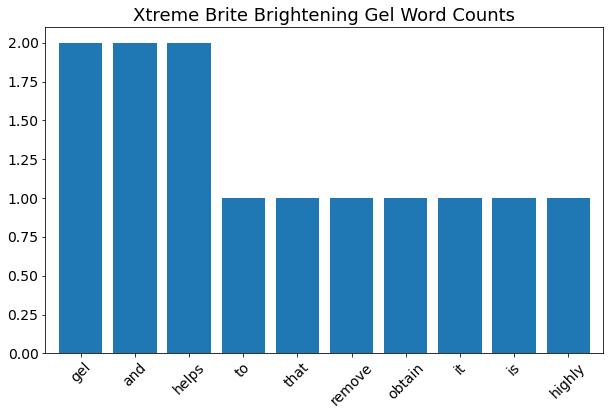

In [17]:
#Extract text for a particular item
title = 'Xtreme Brite Brightening Gel 1oz.'
text = product_df[title]
#Define the count vectorizer that will be used to process the data
count_vectorizer = CountVectorizer()
#Apply this vectorizer to text to get a sparse matrix of counts
count_matrix = count_vectorizer.fit_transform([text])
#Get the names of the features
features = count_vectorizer.get_feature_names()
#Create a series from the sparse matrix
d = pd.Series(count_matrix.toarray().flatten(), 
              index = features).sort_values(ascending=False)

ax = d[:10].plot(kind='bar', figsize=(10,6), width=.8, fontsize=14, rot=45,
            title='Xtreme Brite Brightening Gel Word Counts')
ax.title.set_size(18)

TF-IDF VECTORS

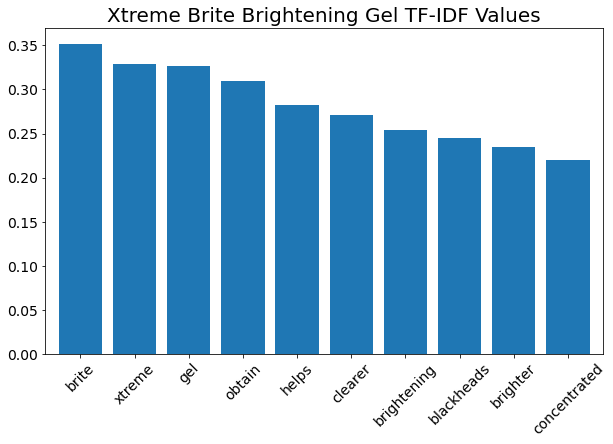

In [18]:
#Define the TFIDF vectorizer that will be used to process the data
tfidf_vectorizer = TfidfVectorizer(analyzer='word',min_df=0,stop_words='english')
#Apply this vectorizer to the full dataset to create normalized vectors
tfidf_matrix = tfidf_vectorizer.fit_transform(product_df)
#Get the names of the features
features = tfidf_vectorizer.get_feature_names()
#get the row that contains relevant vector
row = product_df.index.get_loc(title)
#Create a series from the sparse matrix
d = pd.Series(tfidf_matrix.getrow(row).toarray().flatten(), index = features).sort_values(ascending=False)

ax = d[:10].plot(kind='bar', title='Xtreme Brite Brightening Gel TF-IDF Values',
            figsize=(10,6), width=.8, fontsize=14, rot=45 )
ax.title.set_size(20)

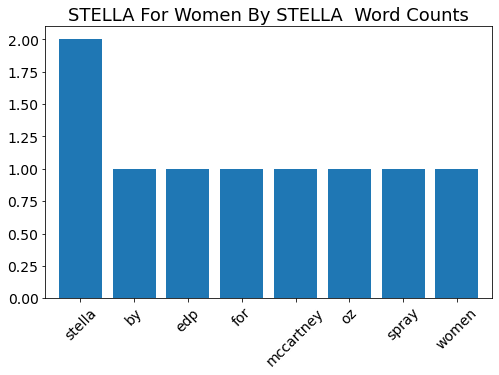

In [19]:
title1 = 'Stella McCartney Stella'
text = product_df[title1]
count_vectorizer = CountVectorizer()
count_matrix = count_vectorizer.fit_transform([text])
features = count_vectorizer.get_feature_names()
d = pd.Series(count_matrix.toarray().flatten(), 
              index = features).sort_values(ascending=False)

ax = d[:10].plot(kind='bar', figsize=(8,5), width=.8, fontsize=14, rot=45,
            title='STELLA For Women By STELLA  Word Counts',color = 'C0')
ax.title.set_size(18)

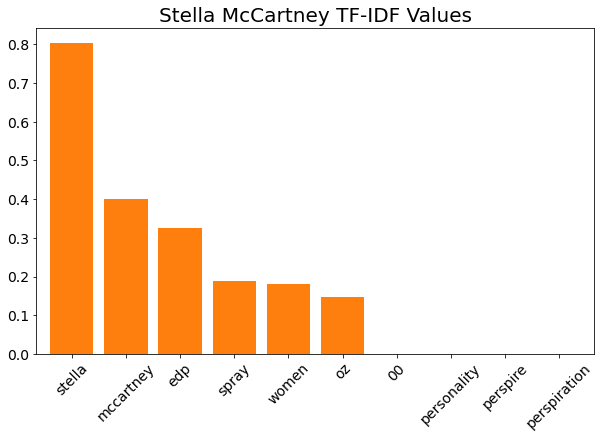

In [20]:
#Define the TFIDF vectorizer that will be used to process the data
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
#Apply this vectorizer to the full dataset to create normalized vectors
tfidf_matrix = tfidf_vectorizer.fit_transform(product_df)
#Get the names of the features
features = tfidf_vectorizer.get_feature_names()
#get the row that contains relevant vector
row = product_df.index.get_loc(title1)
#Create a series from the sparse matrix
d = pd.Series(tfidf_matrix.getrow(row).toarray().flatten(), index = features).sort_values(ascending=False)

ax = d[:10].plot(kind='bar', title='Stella McCartney TF-IDF Values',
            figsize=(10,6), width=.8, fontsize=14, rot=45, color = 'C1' )
ax.title.set_size(20)

In [21]:
d

stella          0.802225
mccartney       0.401112
edp             0.326104
spray           0.187490
women           0.181018
                  ...   
enviromental    0.000000
enviro          0.000000
enviable        0.000000
enver           0.000000
zzz             0.000000
Length: 24784, dtype: float64

Using Cosine Similarity Score to Identify Similar items
Let us first try to build a recommender using descriptions only

In [22]:
tf = TfidfVectorizer(analyzer='word',ngram_range=(1, 2),min_df=0, stop_words='english')
tfidf_matrix = tf.fit_transform(product['description'])
tfidf_matrix

<11346x262450 sparse matrix of type '<class 'numpy.float64'>'
	with 874430 stored elements in Compressed Sparse Row format>

Since we have used the TF-IDF Vectorizer, calculating the Dot Product will directly give us the Cosine Similarity Score.

In [23]:
cosine_similarity(X = tfidf_matrix, Y=None, dense_output=True)

array([[1.        , 0.0044185 , 0.        , ..., 0.        , 0.01131413,
        0.01138293],
       [0.0044185 , 1.        , 0.        , ..., 0.        , 0.00751717,
        0.        ],
       [0.        , 0.        , 1.        , ..., 0.        , 0.        ,
        0.00551829],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.01131413, 0.00751717, 0.        , ..., 0.        , 1.        ,
        0.00793195],
       [0.01138293, 0.        , 0.00551829, ..., 0.        , 0.00793195,
        1.        ]])

We can also use sklearn's linear_kernel instead of cosine_similarities since it is much faster.

In [24]:
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

In [25]:
cosine_sim[1]

array([0.0044185 , 1.        , 0.        , ..., 0.        , 0.00751717,
       0.        ])

We now have a pairwise cosine similarity matrix for all the items in our dataset.

In [26]:
product = product.reset_index()
titles = product['title']
indices = pd.Series(product.index, index=product['title'])

In [27]:
indices.head()

title
WAWO 15 Color Professionl Makeup Eyeshadow Camouflage Facial Concealer Neutral Palette    0
Xtreme Brite Brightening Gel 1oz.                                                         1
Prada Candy By Prada Eau De Parfum Spray 1.7 Oz For Women                                 2
Versace Bright Crystal Eau de Toilette Spray for Women, 3 Ounce                           3
Stella McCartney Stella                                                                   4
dtype: int64

Create a function that takes a single row of the tf-idf matrix (corresponding to a particular document), and return the n highest scoring words (or more generally tokens or features):

In [28]:
def get_highest_cosine_sim(title):
    # get index of a particular item
    idx = indices[title]
    # list score of each title
    sim_scores = list(enumerate(cosine_sim[idx]))
    # sort scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    # get 30 highest scores exclude itself
    sim_scores = sim_scores[1:31]
    # print(sim_scores)
    # get item index
    item_indices = [i[0] for i in sim_scores]
    item_distance = [j[1] for j in sim_scores]
    result = pd.DataFrame({'distance':item_distance, 'title': titles.iloc[item_indices]})
    return result

In [29]:
get_highest_cosine_sim('Stella McCartney Stella').head(10)

,distance,title
7522,0.284619,Jessica Simpson I Fancy You Women Eau De Parfu...
341,0.265153,Pheromone By Marilyn Miglin For Women. Eau De ...
1526,0.163313,Sarah Jessica Parker Lovely Eau de Parfum Spra...
2244,0.132577,Sex In The City Kiss by Instyle Parfums Eau De...
6806,0.123196,"Jimmy Choo Women Eau De Parfum Spray, 3.3 Ounce"
6390,0.098751,Karen Low Pure Pink Eau De Parfum Spray for Wo...
3810,0.095380,Sensual By Johan B Perfume for Women 2.8 Oz / ...
5685,0.090665,"Sex In The City Love for Women, Eau De Parfum ..."
951,0.079455,Paris Hilton by Paris Hilton for Women - 1.7 O...
903,0.074957,PALOMA PICASSO For Women By PALOMA PICASSO Eau...
